In [1]:
from GyroSolver import *
import numpy as np
import matplotlib.pyplot as plt

# I- Introduction :

Ce stage est réalisé dans le cadre de l'UE LU3PY205 du S5, au sein de l'équipe Circuits Quantiques Hybrides $HCQ$ du Laboratoire de Physique de l'École Normale Supérieure d'Ulm $LPENS$, sous l'encadrement du Dr. Matthieu Delbecq.

# II- Mouvement libre du Gyroscope :

Comme il a été détaillé dans l'étude théorique, l'Hamiltonien du système $\{\text{Gyroscope}\}$ dans le référentiel du laboratoire supposé galiléen est :

$$\mathcal{H}_\text{libre} = \dfrac{p_\theta^2}{2 \tilde{J_1}} + \dfrac{p_\psi^2}{2 J_3} + \dfrac{\left( p_\varphi - \cos(\theta)p_\psi \right)^2}{2\tilde{J_1} \sin^2(\theta)} + mgh\cos(\theta) $$

Cet Hamiltonien peut se mettre sous la forme plus commode :

$$\mathcal{H}_\text{libre} = \mathcal{T}_\psi + \mathcal{T}_\theta + \mathcal{N} - \overrightarrow{PG} \cdot m\overrightarrow{g} $$

Où $\mathcal{T}_\psi$ représente l'énergie de rotation "propre", $\mathcal{T}_\theta$ l'énergie de rotation dûe à la Nutation (variation de la colatitude $\theta$), et enfin $\mathcal{N}$ le terme divergent responsable de la Nutation. 

On intoduit les moments conjugués aux angles d'Euler :

$$ \left\{ \begin{array}{r c l c l} 
p_\theta & = & \tilde{J}_1 \dot{\theta}  \\
p_\varphi & = & \tilde{J}_1 \sin^2(\theta) \varphi + \cos(\theta) p_\psi  \\
p_\psi & = &  J_3\left( \dot{\psi} + \cos(\theta) \dot{\varphi} \right)
\end{array}   \right. $$  

Où $\tilde{J}_1 = J_1 + mh^2$

$\;$



Pour la simulation numérique, on déduit les équations du mouvement à partir des équation de Hamilton, on alors :



$$ \left\{ \begin{array}{r c l c l} 
\ddot{\theta} & = & \dfrac{mgh}{\tilde{J_1}} \sin(\theta) + \dfrac{p_\psi }{\tilde{J_1}}  \sin(\theta) \dot{\varphi}+\sin(\theta)\cos(\theta) (\dot{\varphi})^2  \\
\ddot{\varphi} & = & -\dfrac{2}{\tan(\theta)}\dot{\theta}\dot{\varphi} + \dfrac{p_\psi}{\tilde{J_1} \sin(\theta)}\dot{\theta}   \\
\ddot{\psi} & = &  \dfrac{1+\cos^2(\theta)}{\sin(\theta)}\dot{\theta}\dot{\varphi} - \dfrac{p_\psi}{\tilde{J_1} \tan(\theta)}\dot{\theta} 
\end{array}   \right. $$  



On obtient ainsi un système de 3 équations différentielles non-linéraires couplées d'ordre 1. ???


Les paramètres du problème sont estimés à partir des valeurs constructeurs du Gyroscope.


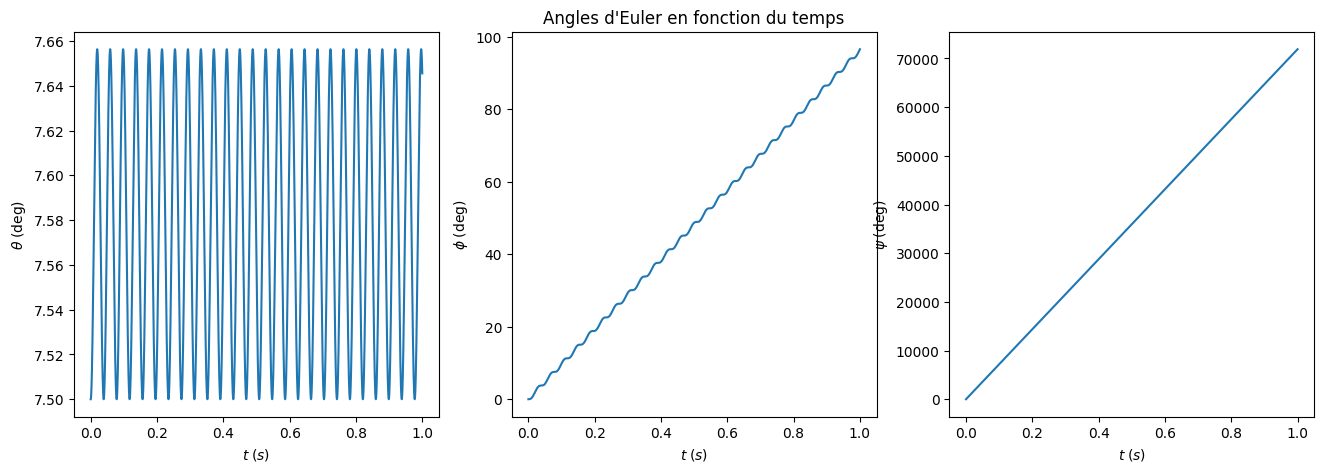

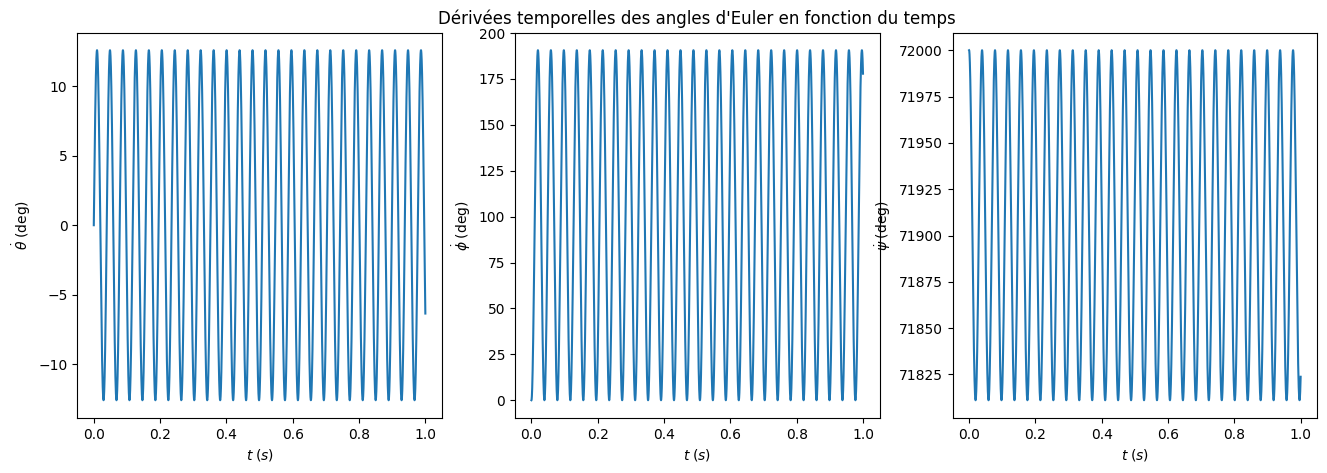

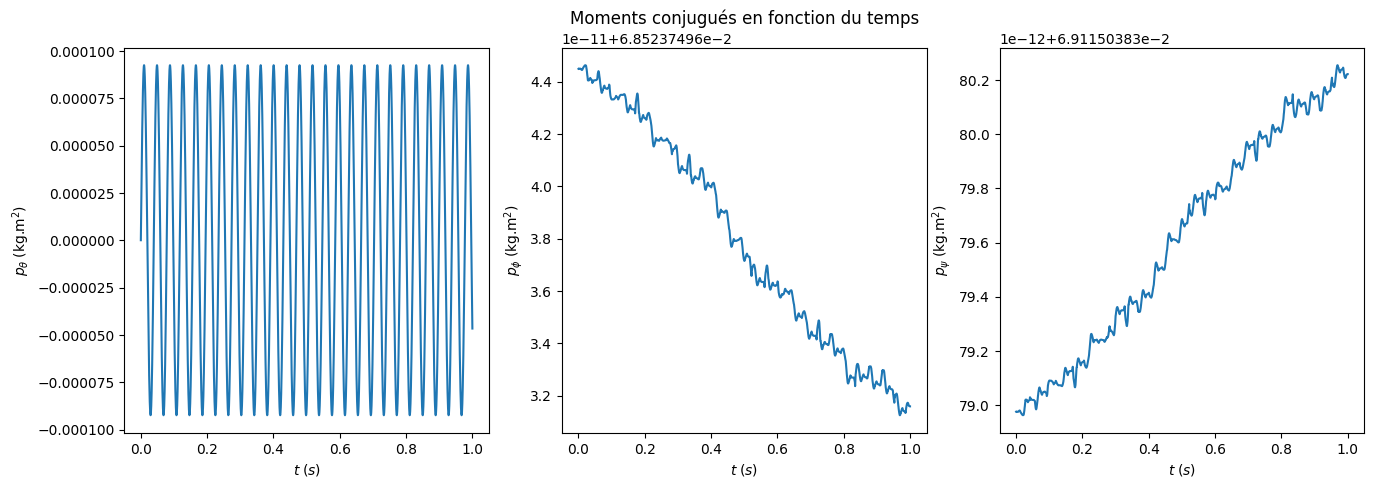

In [2]:
g = 9.81           # m/s^2
m = 0.375          # kg
J3 = 0.000055      # kg.m^2
J1 = 0.000055      # kg.m^2
h = 31.25 * 1e-3   # m
x0 =  0.1
f_exc = 0.1
p = 0.1

params = [g, m, h, J1, J3, x0, p, f_exc]
#CI = [np.pi / 6, 0, 0, 9.936, 0, 2 * np.pi * 200]
CI = [np.pi / 24 , 0, 0, 0, 0, 2 * np.pi * 200]

t, the_free, phi_free, psi_free, the_d_free, phi_d_free, psi_d_free = Solve_Gyro(0, 1, CI, params, 
                                    solving_method='RK23', forcing='FREE', nb_points=10000)

p_the_free, p_phi_free, p_psi_free = Conjugated_Momentums(the_free, phi_free, 
                                    psi_free, the_d_free, phi_d_free, psi_d_free, params)

Plot_Gyro_Angles(t, the_free, phi_free, psi_free)

Plot_Gyro_Speed_Angles(t, the_d_free, phi_d_free, psi_d_free)

Plot_Gyro_Momentum(t, p_the_free, p_phi_free, p_psi_free)



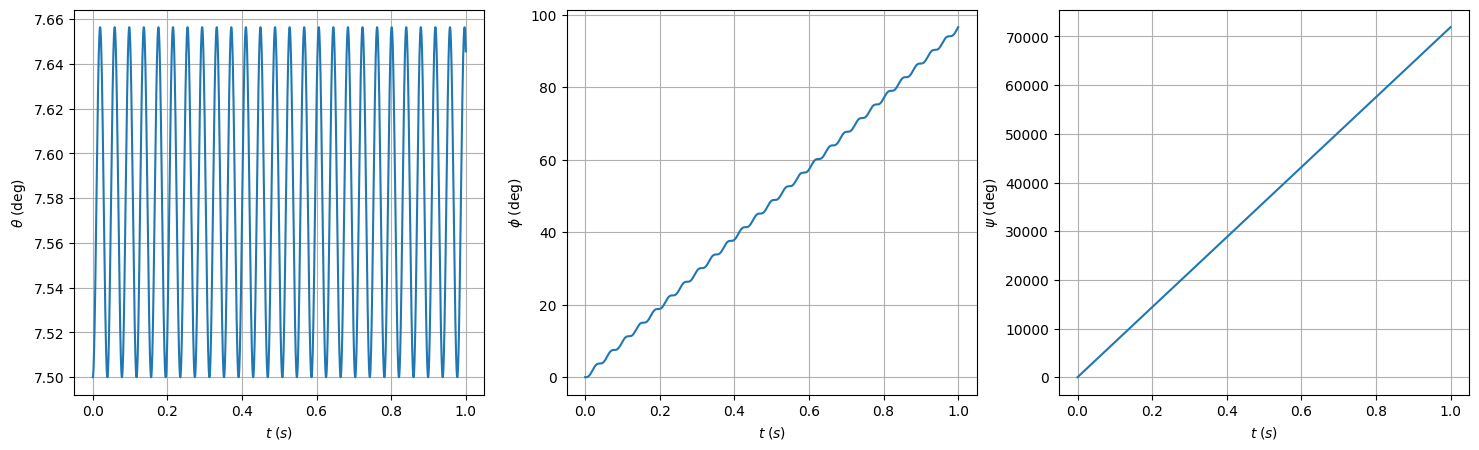

In [3]:
plt.figure(figsize=[18, 5])
plt.subplot(1,3,1)
plt.plot(t, the_free * 180 / np.pi)
plt.xlabel(r'$t \;(s)$')
plt.ylabel(r'$\theta \; (\text{deg})$')
plt.grid()
    
plt.subplot(1,3,2)
#plt.title(r"Angles d'Euler en fonction du temps")
plt.plot(t, phi_free * 180 / np.pi)
plt.xlabel(r'$t \;(s)$')
plt.ylabel(r'$\phi \; (\text{deg})$')
plt.grid()
    
plt.subplot(1,3,3)
plt.plot(t, psi_free * 180 / np.pi)
plt.xlabel(r'$t \;(s)$')
plt.ylabel(r'$\psi \; (\text{deg})$')
#plt.yticks([0, 5000 * 2 *np.pi, 10000 * 2 * np.pi], [r'$0$', r'$5000 \times 2\pi$', r'$10000 \times 2\pi$'])
plt.grid()

plt.savefig('AnglesFree.png')

plt.show()

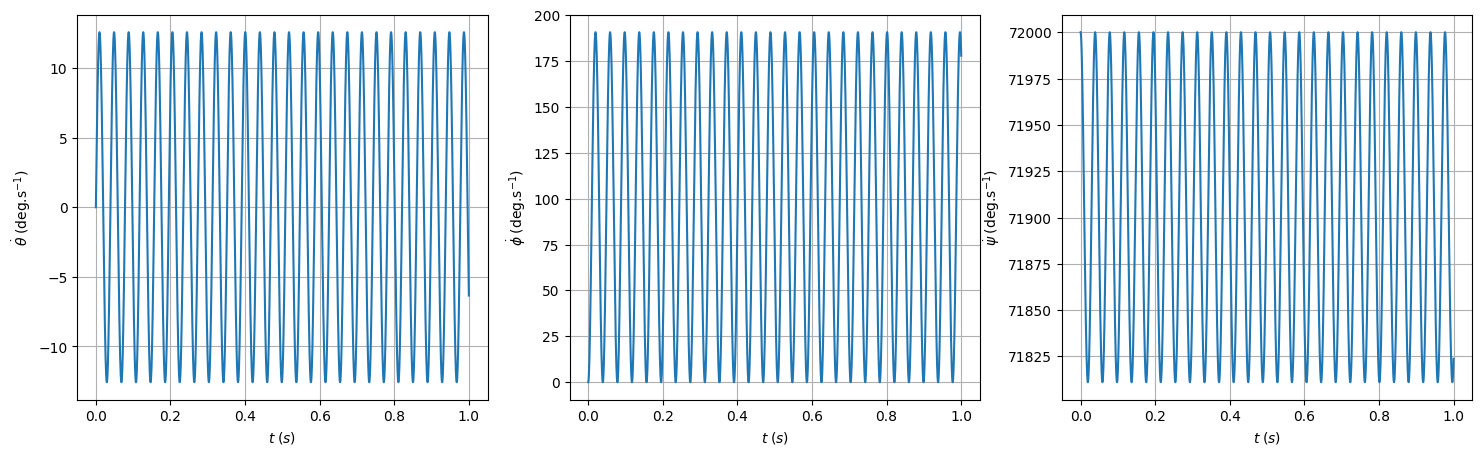

In [4]:
    plt.figure(figsize=[18, 5])
    plt.subplot(1,3,1)
    plt.plot(t, the_d_free * 180 / np.pi)
    plt.xlabel(r'$t \;(s)$')
    plt.ylabel(r'$\dot{\theta} \; (\text{deg.s}^{-1})$')
    plt.grid()
        
    plt.subplot(1,3,2)
    #plt.title(r"Dérivées temporelles des angles d'Euler en fonction du temps")
    plt.plot(t, phi_d_free * 180 / np.pi)
    plt.xlabel(r'$t \;(s)$')
    plt.ylabel(r'$\dot{\phi} \; (\text{deg.s}^{-1})$')
    plt.grid()
    
    plt.subplot(1,3,3)
    plt.plot(t, psi_d_free * 180 / np.pi)
    plt.xlabel(r'$t \;(s)$')
    plt.ylabel(r'$\dot{\psi} \; (\text{deg.s}^{-1})$')
    plt.grid()

    plt.savefig('VitessesFree.png')

    plt.show()

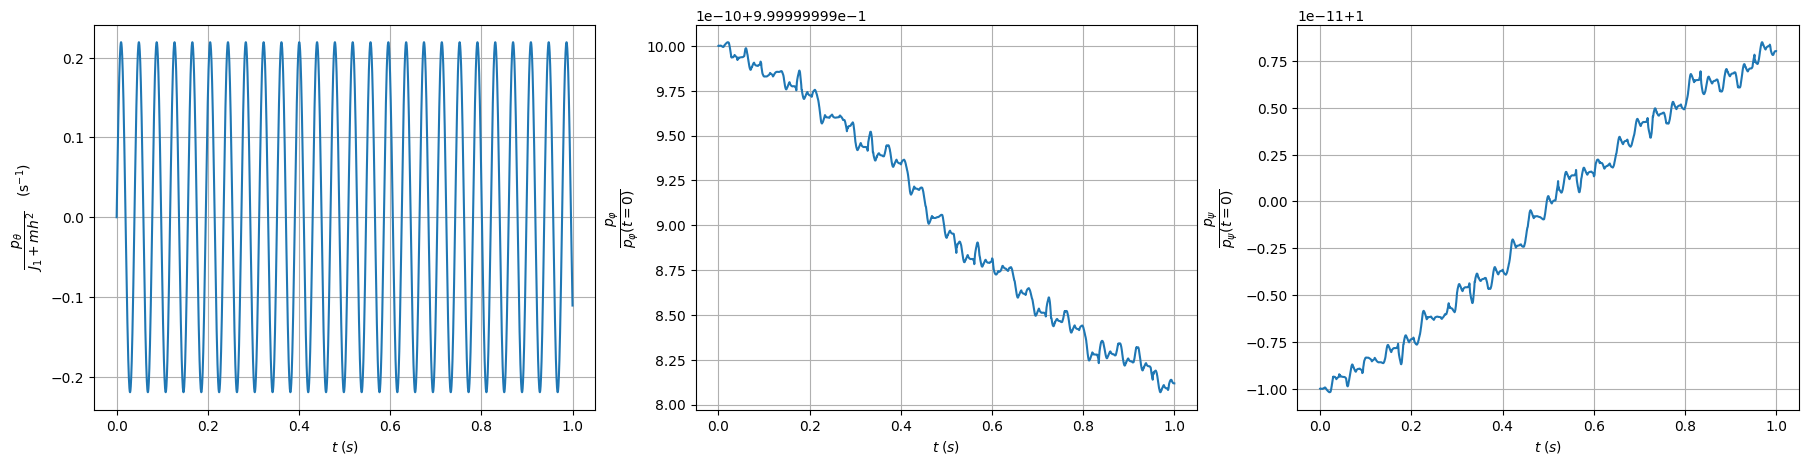

In [5]:
    plt.figure(figsize=[22, 5])
    plt.subplot(1,3,1)
    plt.plot(t, p_the_free / (J1 + m*(h**2)))
    plt.xlabel(r'$t \;(s)$')
    plt.ylabel(r'$\dfrac{p_\theta}{J_1 + mh^2} \quad (\text{s}^{-1})$')
    plt.grid()
    plt.subplot(1,3,2)
    #plt.title(r"Moments conjugués en fonction du temps")
    plt.plot(t, p_phi_free / p_phi_free[0])
    plt.xlabel(r'$t \;(s)$')
    plt.ylabel(r'$\dfrac{p_\varphi}{p_\varphi(t=0)}$')
    plt.grid()
    plt.subplot(1,3,3)
    plt.plot(t, p_psi_free / p_psi_free[0])
    plt.xlabel(r'$t \;(s)$')
    #plt.ylabel(r'$p_\psi \quad (\text{kg.m}^2)$')
    plt.ylabel(r'$\dfrac{p_\psi}{p_\psi(t=0)}$')
    plt.grid()

    plt.savefig('MomentsConjugFree.png')
    plt.show()

In [6]:
p_psi_free[0]

0.06911503837897545

In [7]:
path_Free = Get_Path(t, the_free, phi_free, psi_free)
#path_Free

$\;$

On note $\left( \vec{u}_\theta, \vec{u}_\varphi, \vec{u}_\psi \right)$ les vecteurs normées associées aux rotations des angles d'Euler, ils sont donnés dans la base cartésienne $\beta$ par :

$$\left\{  \begin{array}{r c l} 
\vec{u}_\theta & = & \left[ \cos(\varphi), \; \sin(\varphi), \; 0 \right]_\beta = \vec{u}_\rho \\
\vec{u}_\varphi & = & \left[ 0, \; 0, \; 1 \right]_\beta = \vec{u}_z  \\
\vec{u}_\psi & = & \left[ \sin(\theta)\sin(\varphi), \; -\sin(\theta) \cos(\varphi), \; \cos(\theta) \right]_\beta
\end{array} \right .   $$

Le poids $\vec{P}$ qui donne naissance à la précession exerce un moment que l'on note $\Gamma(\vec{P})$ donné par :

$$ \Gamma(\vec{P}) = mgh\sin(\theta) \vec{u}_\theta $$

$\;$

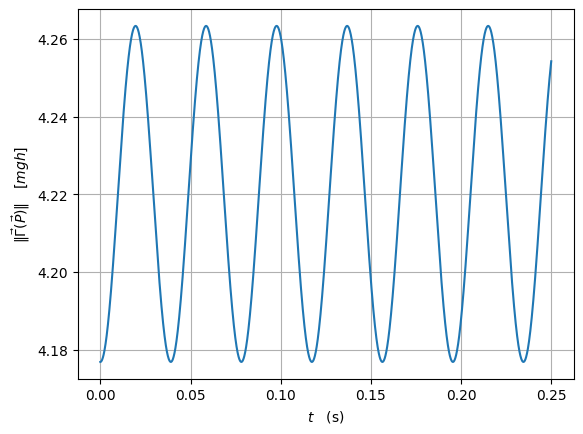

In [8]:
Gamma_P = Momentum_Weight(the_free, phi_free, psi_free, params)

plt.figure()
plt.plot(t[t <= 0.25], Gamma_P[t <= 0.25] / (m*g*h))
plt.xlabel(r'$t \quad (\text{s})$')
#plt.ylabel(r'$\vec{\Gamma}(\vec{P}) \; (\text{kg.m}^2.\text{s}^{-2})$')
plt.ylabel(r'$ \Vert\vec{\Gamma}(\vec{P}) \Vert   \quad [mgh]$')
#plt.title('Évolution du moment du Poids en fonction du temps')
plt.grid()

plt.savefig('MomentPoidsFree.png')
plt.show()

$\;$

$\;$

---------


$\;$

$\;$

# III- Mouvement Forcé :

Comme il a été détaillé dans l'étude théorique, l'Hamiltonien du système $\{\text{Gyroscope}\}$ dans le référentiel du laboratoire supposé galiléen est pour un forçage selon XY :

$$\mathcal{H} = \mathcal{H}_\text{libre} - mhx_0\omega^2 \sin(\omega t + \Phi - \varphi) \sin(\theta) $$

Les équations du mouvement deviennent donc :

$$ \left\{ \begin{array}{r c l c l} 
\ddot{\theta} & = & \dfrac{mgh}{\tilde{J_1}} \sin(\theta) + \dfrac{p_\psi }{\tilde{J_1}}  \sin(\theta) \dot{\varphi}+\sin(\theta)\cos(\theta) (\dot{\varphi})^2 - \dfrac{mhx_0\omega^2}{\tilde{J}_1}\cos(\theta) \sin(\omega t + \Phi - \varphi) \\
\ddot{\varphi} & = & -\dfrac{2}{\tan(\theta)}\dot{\theta}\dot{\varphi} + \dfrac{p_\psi}{\tilde{J_1} \sin(\theta)}\dot{\theta} + \dfrac{mhx_0\omega^2}{\tilde{J}_1}\dfrac{\cos(\omega t + \Phi - \varphi)}{\sin(\theta)}   \\
\ddot{\psi} & = &  \dfrac{1+\cos^2(\theta)}{\sin(\theta)}\dot{\theta}\dot{\varphi} - \dfrac{p_\psi}{\tilde{J_1} \tan(\theta)}\dot{\theta} - \dfrac{mhx_0\omega^2}{\tilde{J}_1} \dfrac{\cos(\omega t+\Phi -\varphi)}{\tan(\theta)}
\end{array}   \right. $$ 

In [9]:
CI = [np.pi / 24, 0, 0, 0, 0, 2 * np.pi * 200]
x0 =  10 * 1e-2     # m
f_exc = 0.265          # s^-1        
p = np.pi         # rad

params = [g, m, h, J1, J3, x0, p, f_exc]

Gyro_Carac_Values(params, CI)

Larmor Pulsation (th) :               +1.663
Larmor Frequency (th) :               +0.265
Larmor Period (th) :               +3.777 

Rabi Pulsation (th) :               +0.024
Rabi Period (th) :             +267.331
Temps de montée (th) :             +133.666 

Rapport des pulsations Larmor/Rabi :              +70.770 

Rapport Approx Gyroscopique :          +14_912.892 



Duration : 8.486907958984375


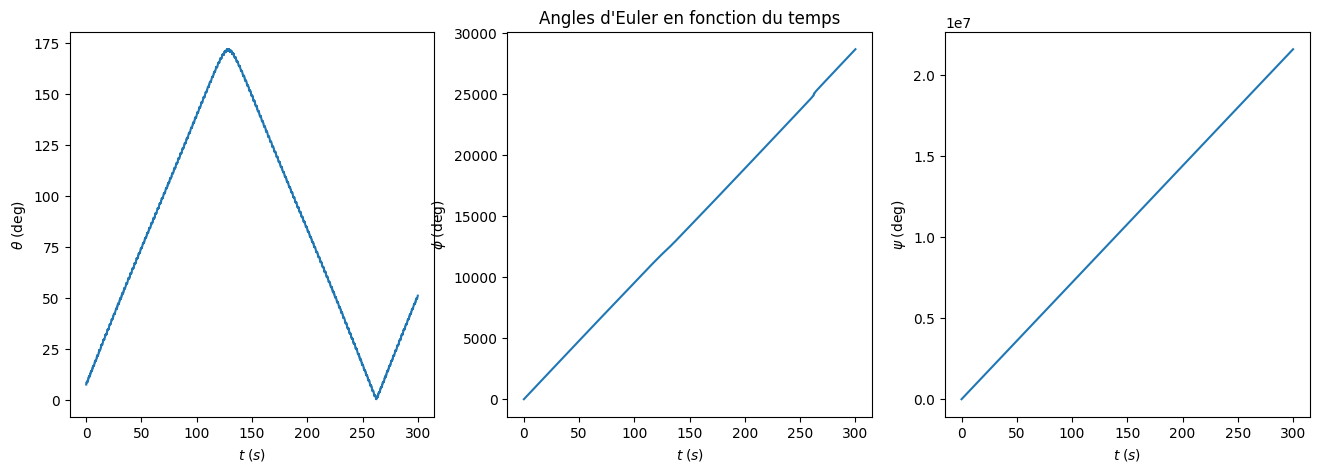

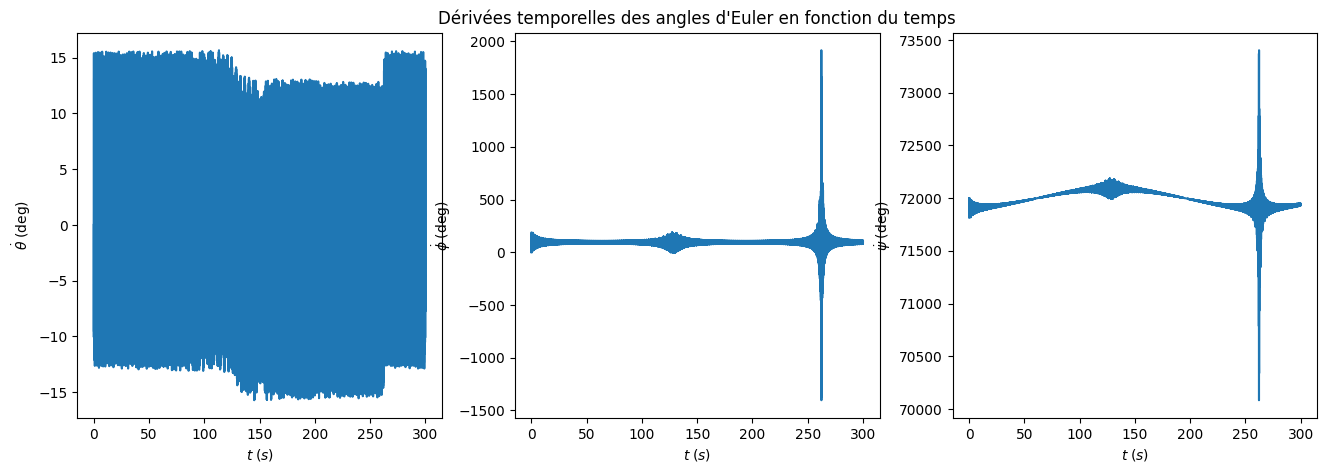

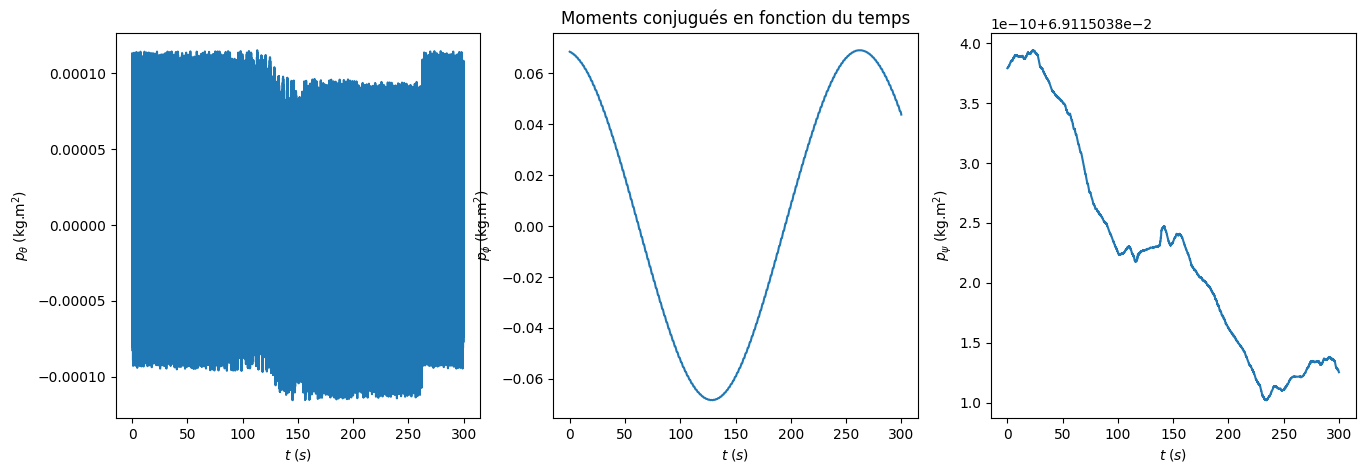

In [10]:
from time import time
t1 = time()
t, the, phi, psi, the_d, phi_d, psi_d = Solve_Gyro(0, 300, CI, params, solving_method='RK23', forcing='X', nb_points=10000)
t2 = time()
print('Duration :', t2-t1)

path_Forced = Get_Path(t, the, phi, psi)
#path_Forced

p_the, p_phi, p_psi = Conjugated_Momentums(the, phi, psi, the_d, phi_d, psi_d, params)

Plot_Gyro_Angles(t, the, phi, psi)

Plot_Gyro_Speed_Angles(t, the_d, phi_d, psi_d)

Plot_Gyro_Momentum(t, p_the, p_phi, p_psi)



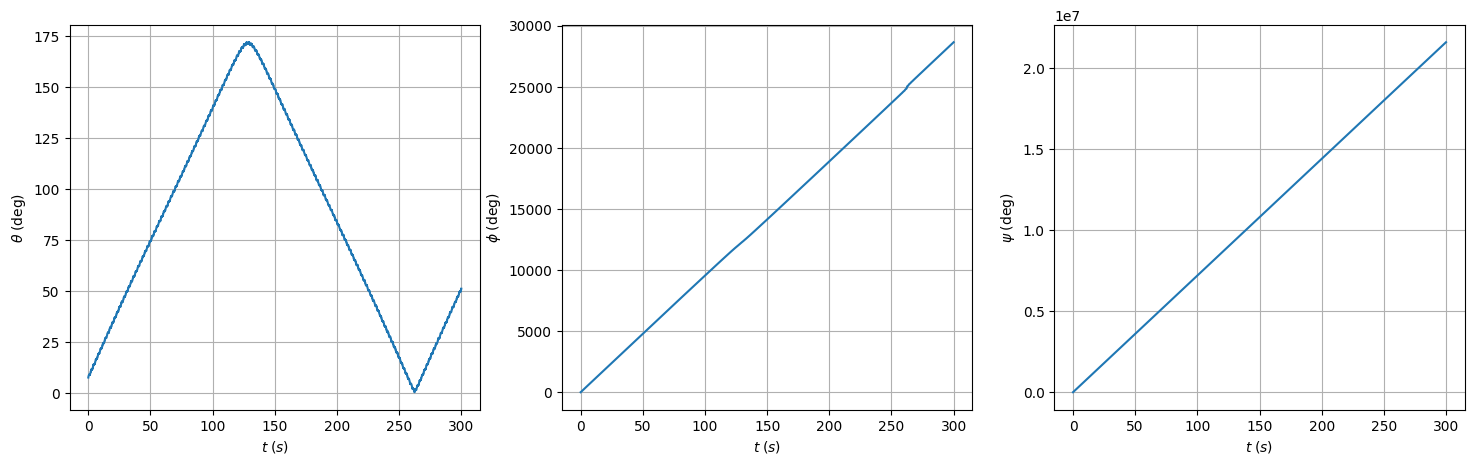

In [11]:
plt.figure(figsize=[18, 5])
plt.subplot(1,3,1)
plt.plot(t, the * 180 / np.pi)
plt.xlabel(r'$t \;(s)$')
plt.ylabel(r'$\theta \; (\text{deg})$')
plt.grid()
    
plt.subplot(1,3,2)
#plt.title(r"Angles d'Euler en fonction du temps")
plt.plot(t, phi * 180 / np.pi)
plt.xlabel(r'$t \;(s)$')
plt.ylabel(r'$\phi \; (\text{deg})$')
plt.grid()
    
plt.subplot(1,3,3)
plt.plot(t, psi * 180 / np.pi)
plt.xlabel(r'$t \;(s)$')
plt.ylabel(r'$\psi \; (\text{deg})$')
#plt.yticks([0, 5000 * 2 *np.pi, 10000 * 2 * np.pi], [r'$0$', r'$5000 \times 2\pi$', r'$10000 \times 2\pi$'])
plt.grid()

plt.savefig('AnglesX.png')

plt.show()

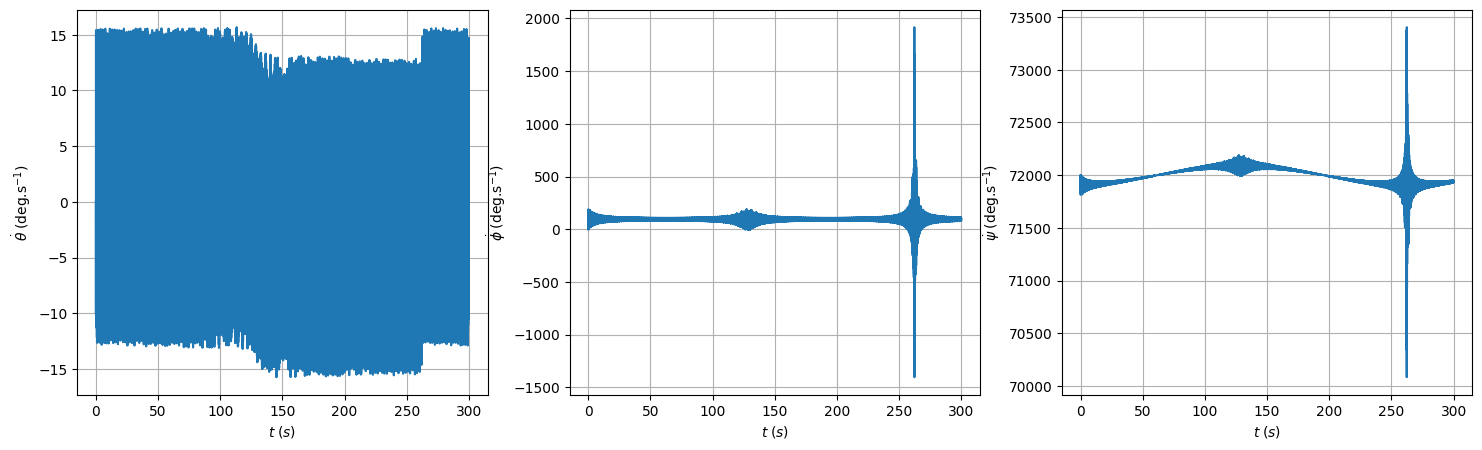

In [13]:
    plt.figure(figsize=[18, 5])
    plt.subplot(1,3,1)
    plt.plot(t, the_d * 180 / np.pi)
    plt.xlabel(r'$t \;(s)$')
    plt.ylabel(r'$\dot{\theta} \; (\text{deg.s}^{-1})$')
    plt.grid()
        
    plt.subplot(1,3,2)
    #plt.title(r"Dérivées temporelles des angles d'Euler en fonction du temps")
    plt.plot(t, phi_d * 180 / np.pi)
    plt.xlabel(r'$t \;(s)$')
    plt.ylabel(r'$\dot{\phi} \; (\text{deg.s}^{-1})$')
    plt.grid()
    
    plt.subplot(1,3,3)
    plt.plot(t, psi_d * 180 / np.pi)
    plt.xlabel(r'$t \;(s)$')
    plt.ylabel(r'$\dot{\psi} \; (\text{deg.s}^{-1})$')
    plt.grid()

    plt.savefig('VitessesX.png')

    plt.show()

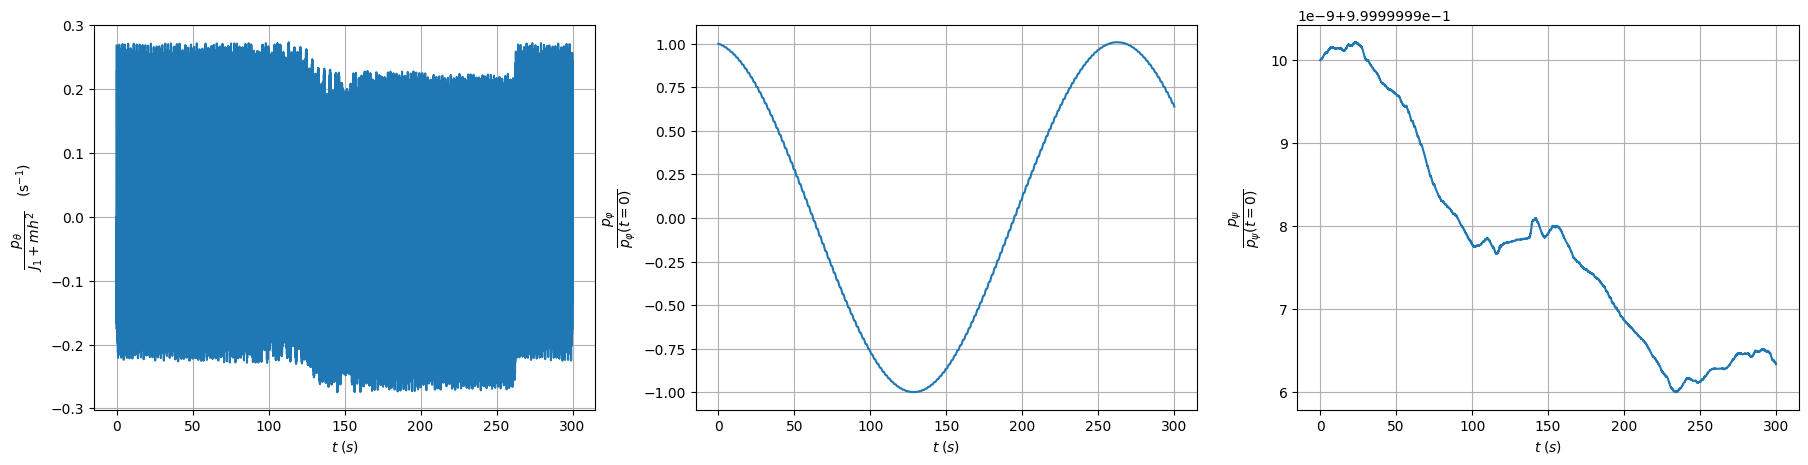

In [14]:
    plt.figure(figsize=[22, 5])
    plt.subplot(1,3,1)
    plt.plot(t, p_the / (J1 + m*(h**2)))
    plt.xlabel(r'$t \;(s)$')
    plt.ylabel(r'$\dfrac{p_\theta}{J_1 + mh^2} \quad (\text{s}^{-1})$')
    plt.grid()
    plt.subplot(1,3,2)
    #plt.title(r"Moments conjugués en fonction du temps")
    plt.plot(t, p_phi / p_phi[0])
    plt.xlabel(r'$t \;(s)$')
    plt.ylabel(r'$\dfrac{p_\varphi}{p_\varphi(t=0)}$')
    plt.grid()
    plt.subplot(1,3,3)
    plt.plot(t, p_psi / p_psi[0])
    plt.xlabel(r'$t \;(s)$')
    #plt.ylabel(r'$p_\psi \quad (\text{kg.m}^2)$')
    plt.ylabel(r'$\dfrac{p_\psi}{p_\psi(t=0)}$')
    plt.grid()

    plt.savefig('MomentsConjugX.png')
    plt.show()

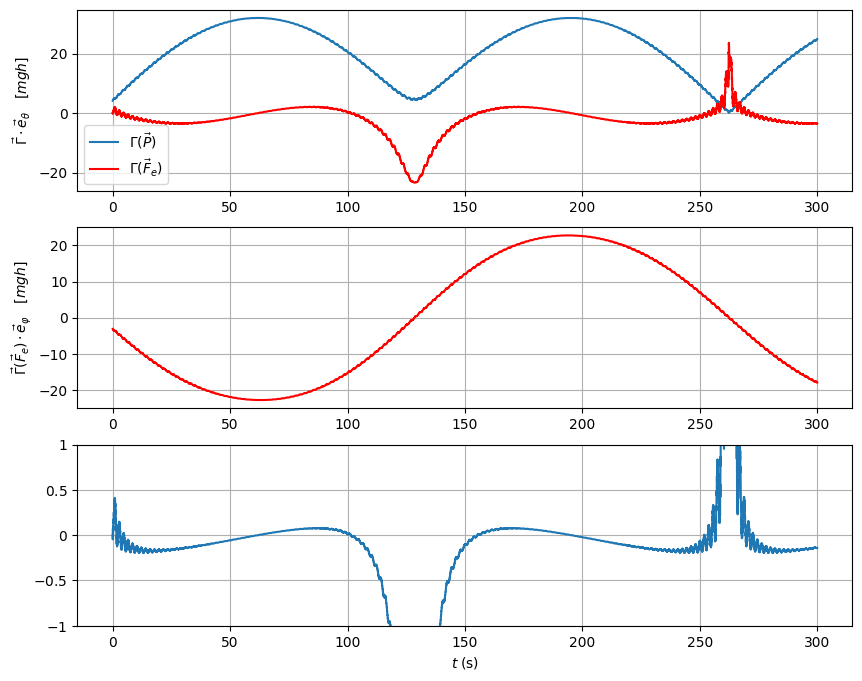

In [15]:
Gamma_P = Momentum_Weight(the, phi, psi, params)
Gamma_Fe_the, Gamma_Fe_phi  = Momentum_Fe(t, the, phi, psi, params)

plt.figure(figsize=[10, 8])

plt.subplot(3, 1, 1)
plt.plot(t, Gamma_P/ (m*g*h), label=r'$\Gamma(\vec{P})$')
plt.plot(t, Gamma_Fe_the/ (m*g*h), label=r'$\Gamma(\vec{F}_e)$', color='r')
plt.ylabel(r'$\vec{\Gamma} \cdot \vec{e}_\theta \quad [mgh]$')
plt.legend()
plt.grid()


plt.subplot(3, 1, 2)
plt.plot(t, Gamma_Fe_phi / (m*g*h), label=r'$\Gamma(\vec{F}_e) \cdot u_\varphi$', color='r')

plt.ylabel(r'$\vec{\Gamma}(\vec{F}_e) \cdot \vec{e}_\varphi \quad [mgh]$')
#plt.title('Évolution du moment du Poids en fonction du temps')
plt.grid()

plt.subplot(3, 1, 3)

plt.plot(t, Gamma_Fe_the / Gamma_P)
plt.grid()
plt.ylim([-1, 1])
plt.yticks([0, -0.5, 0.5, -1, 1], [r'$0$', r'$-0.5$', r'$0.5$', r'$-1$', r'$1$'])
plt.xlabel(r'$t \; (\text{s})$')

plt.savefig('MomentsForcesX.png')

plt.show()

### Assymétrie du forçage :

In [124]:
#tab_freq_sweep = np.arange(0.25, 0.29, 0.001) 
tab_freq_sweep = np.linspace(0.25, 0.28, 51) 
print('Estimated time :', len(tab_freq_sweep) * 4)
t1 = time()
f_max, exc_freq, tab_theta, tab_theta_min, tab_t = Frequency_Sweep_MAX(tab_freq_sweep, params, CI, tf=150
                        , solving_method='RK23', plot=True, forcing='X')
t2 = time()
print(t2 - t1)

Estimated time : 204


KeyboardInterrupt: 

### Démonstration Cobra :

Explain : $\dfrac{\pi}{2} \to t_\text{dem} \to -\dfrac{\pi}{2}$

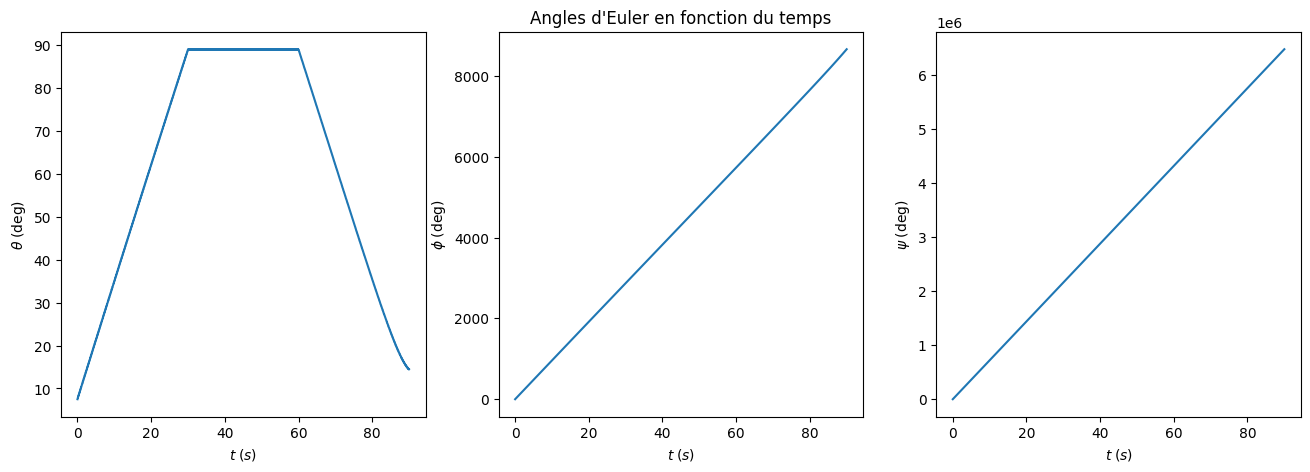

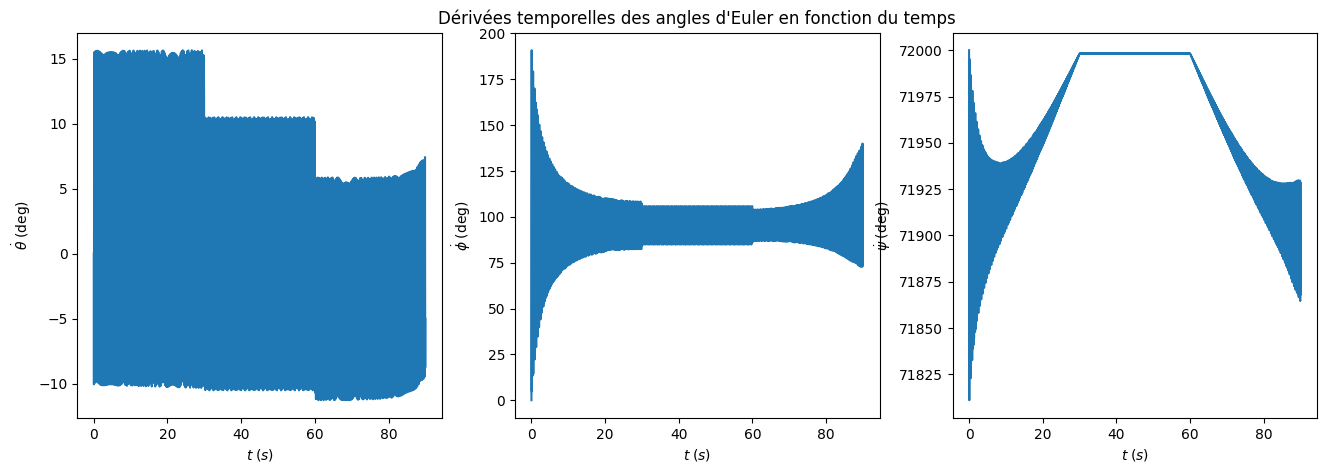

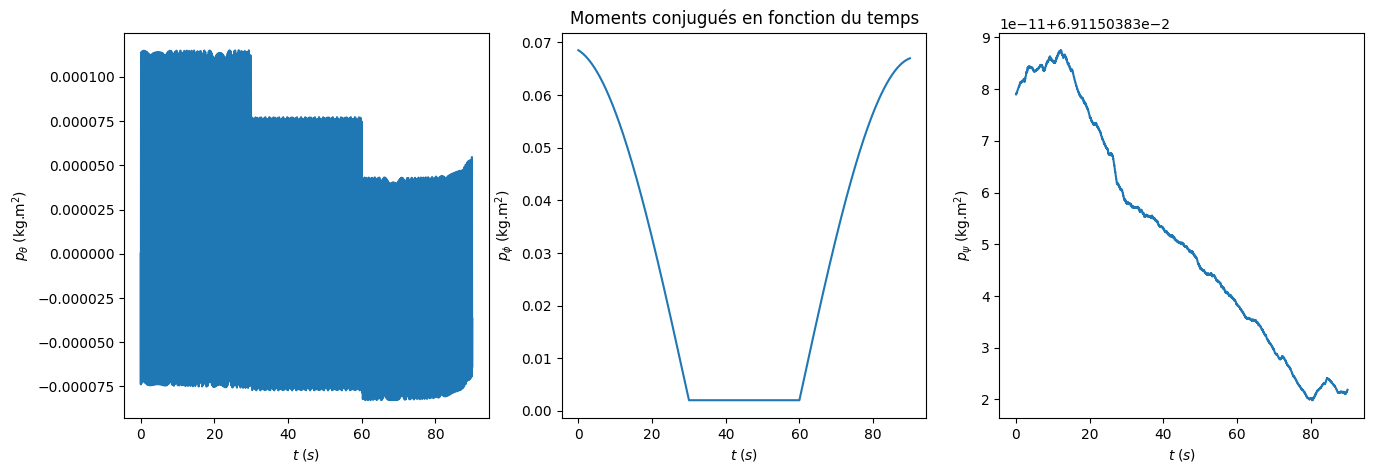

In [17]:
CI = [np.pi / 24, 0, 0, 0, 0, 2 * np.pi * 200]
x0 =  10 * 1e-2     # m
f_exc = 0.265          # s^-1        
p = np.pi         # rad

params = [g, m, h, J1, J3, x0, p, f_exc]

dt1 = 30
dt2 = 30
dt3 = 30

t_Cobra, the_Cobra, phi_Cobra, psi_Cobra, the_d_Cobra, phi_d_Cobra, psi_d_Cobra = Cobra(dt1, dt2, dt3, CI, params, forcing='XY', list_solving_method=['RK23'] * 3, list_nb_points=[1000] * 3)

path_Cobra = Get_Path(t_Cobra, the_Cobra, phi_Cobra, psi_Cobra)
#path_Forced

p_the_Cobra, p_phi_Cobra, p_psi_Cobra = Conjugated_Momentums(the_Cobra, phi_Cobra, psi_Cobra, the_d_Cobra, phi_d_Cobra, psi_d_Cobra, params)

Plot_Gyro_Angles(t_Cobra, the_Cobra, phi_Cobra, psi_Cobra)

Plot_Gyro_Speed_Angles(t_Cobra, the_d_Cobra, phi_d_Cobra, psi_d_Cobra)

Plot_Gyro_Momentum(t_Cobra, p_the_Cobra, p_phi_Cobra, p_psi_Cobra)




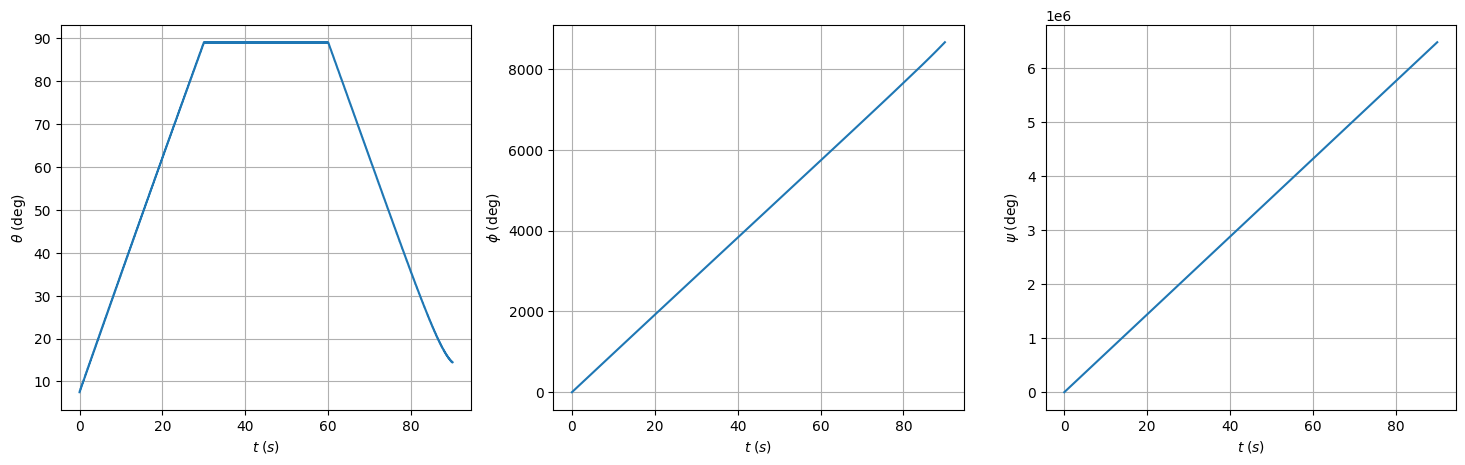

In [18]:
plt.figure(figsize=[18, 5])
plt.subplot(1,3,1)
plt.plot(t_Cobra, the_Cobra * 180 / np.pi)
plt.xlabel(r'$t \;(s)$')
plt.ylabel(r'$\theta \; (\text{deg})$')
plt.grid()
    
plt.subplot(1,3,2)
#plt.title(r"Angles d'Euler en fonction du temps")
plt.plot(t_Cobra, phi_Cobra * 180 / np.pi)
plt.xlabel(r'$t \;(s)$')
plt.ylabel(r'$\phi \; (\text{deg})$')
plt.grid()
    
plt.subplot(1,3,3)
plt.plot(t_Cobra, psi_Cobra * 180 / np.pi)
plt.xlabel(r'$t \;(s)$')
plt.ylabel(r'$\psi \; (\text{deg})$')
#plt.yticks([0, 5000 * 2 *np.pi, 10000 * 2 * np.pi], [r'$0$', r'$5000 \times 2\pi$', r'$10000 \times 2\pi$'])
plt.grid()

plt.savefig('AnglesCobra.png')

plt.show()

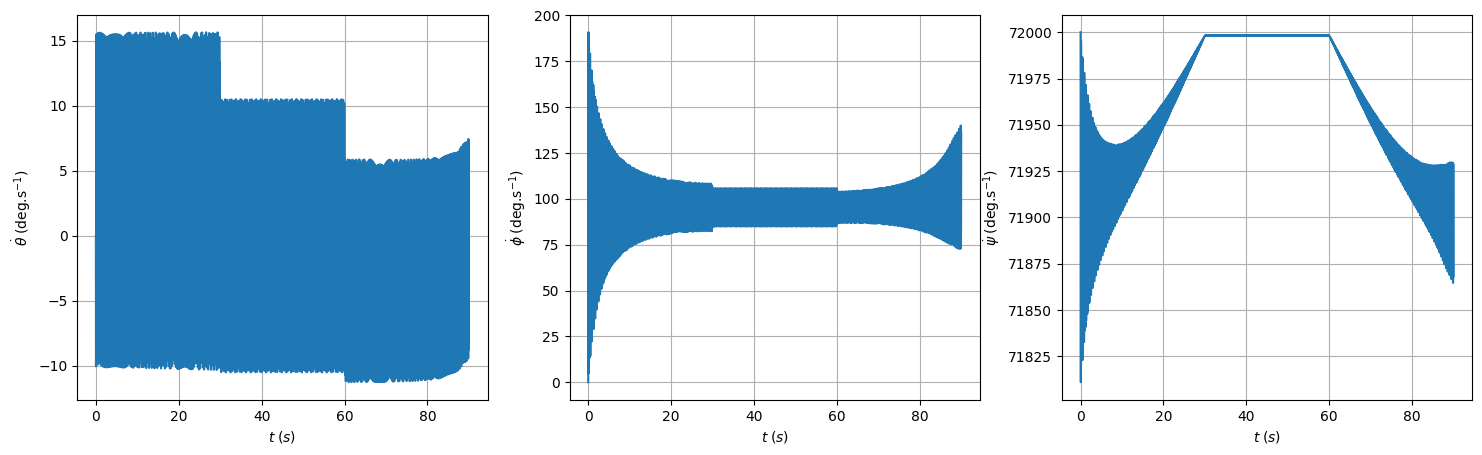

In [19]:
    plt.figure(figsize=[18, 5])
    plt.subplot(1,3,1)
    plt.plot(t_Cobra, the_d_Cobra * 180 / np.pi)
    plt.xlabel(r'$t \;(s)$')
    plt.ylabel(r'$\dot{\theta} \; (\text{deg.s}^{-1})$')
    plt.grid()
        
    plt.subplot(1,3,2)
    #plt.title(r"Dérivées temporelles des angles d'Euler en fonction du temps")
    plt.plot(t_Cobra, phi_d_Cobra * 180 / np.pi)
    plt.xlabel(r'$t \;(s)$')
    plt.ylabel(r'$\dot{\phi} \; (\text{deg.s}^{-1})$')
    plt.grid()
    
    plt.subplot(1,3,3)
    plt.plot(t_Cobra, psi_d_Cobra * 180 / np.pi)
    plt.xlabel(r'$t \;(s)$')
    plt.ylabel(r'$\dot{\psi} \; (\text{deg.s}^{-1})$')
    plt.grid()

    plt.savefig('VitessesCobra.png')

    plt.show()

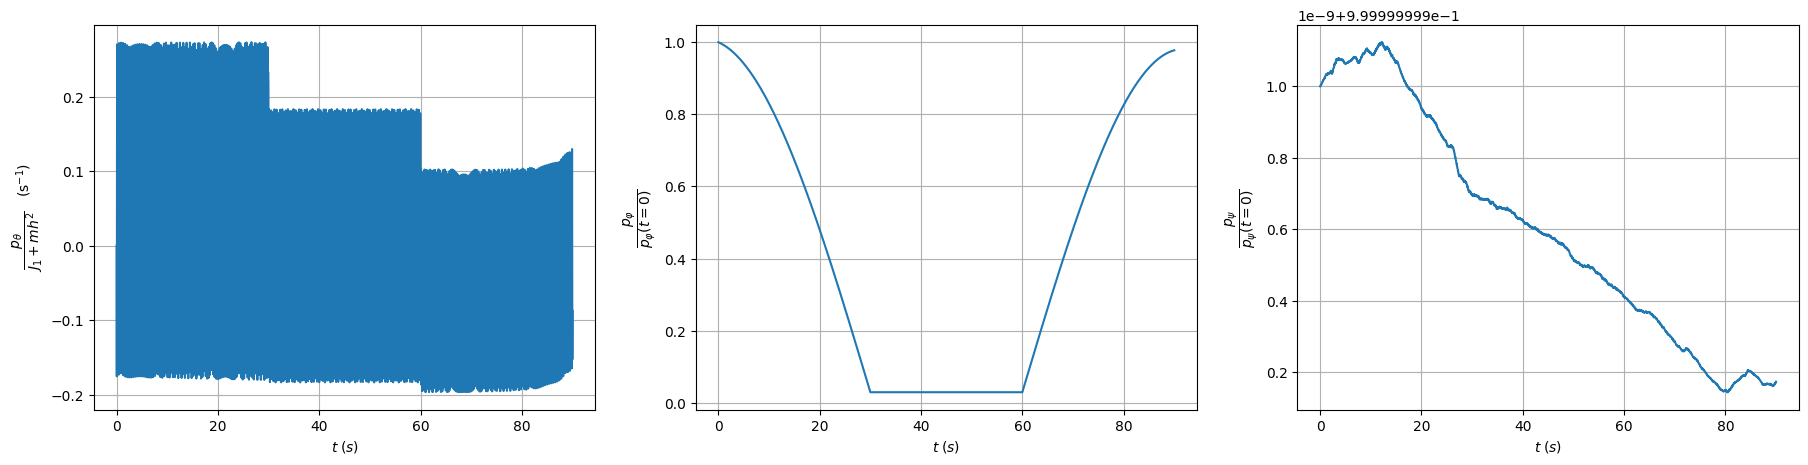

In [20]:
    plt.figure(figsize=[22, 5])
    plt.subplot(1,3,1)
    plt.plot(t_Cobra, p_the_Cobra / (J1 + m*(h**2)))
    plt.xlabel(r'$t \;(s)$')
    plt.ylabel(r'$\dfrac{p_\theta}{J_1 + mh^2} \quad (\text{s}^{-1})$')
    plt.grid()
    plt.subplot(1,3,2)
    #plt.title(r"Moments conjugués en fonction du temps")
    plt.plot(t_Cobra, p_phi_Cobra / p_phi_Cobra[0])
    plt.xlabel(r'$t \;(s)$')
    plt.ylabel(r'$\dfrac{p_\varphi}{p_\varphi(t=0)}$')
    plt.grid()
    plt.subplot(1,3,3)
    plt.plot(t_Cobra, p_psi_Cobra / p_psi_Cobra[0])
    plt.xlabel(r'$t \;(s)$')
    #plt.ylabel(r'$p_\psi \quad (\text{kg.m}^2)$')
    plt.ylabel(r'$\dfrac{p_\psi}{p_\psi(t=0)}$')
    plt.grid()

    plt.savefig('MomentsConjugCobra.png')
    plt.show()

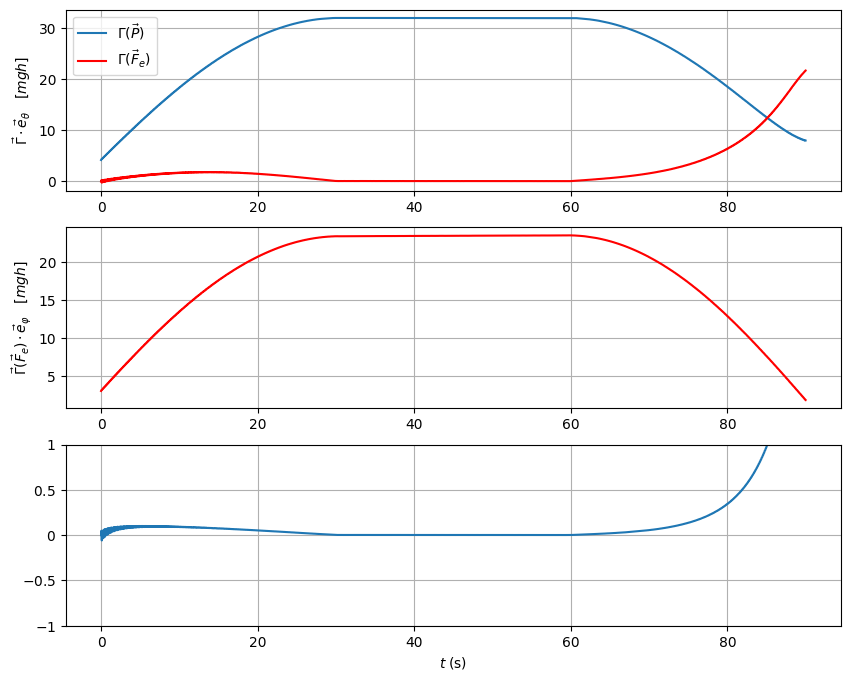

In [21]:
Gamma_P_Cobra = Momentum_Weight(the_Cobra, phi_Cobra, psi_Cobra, params)
Gamma_Fe_the_Cobra, Gamma_Fe_phi_Cobra  = Momentum_Fe(t_Cobra, the_Cobra, phi_Cobra, psi_Cobra, params)

plt.figure(figsize=[10, 8])

plt.subplot(3, 1, 1)
plt.plot(t_Cobra, Gamma_P_Cobra/ (m*g*h), label=r'$\Gamma(\vec{P})$')
plt.plot(t_Cobra, Gamma_Fe_the_Cobra/ (m*g*h), label=r'$\Gamma(\vec{F}_e)$', color='r')
plt.ylabel(r'$\vec{\Gamma} \cdot \vec{e}_\theta \quad [mgh]$')
plt.legend()
plt.grid()


plt.subplot(3, 1, 2)
plt.plot(t_Cobra, Gamma_Fe_phi_Cobra / (m*g*h), label=r'$\Gamma(\vec{F}_e) \cdot u_\varphi$', color='r')

plt.ylabel(r'$\vec{\Gamma}(\vec{F}_e) \cdot \vec{e}_\varphi \quad [mgh]$')
#plt.title('Évolution du moment du Poids en fonction du temps')
plt.grid()

plt.subplot(3, 1, 3)

plt.plot(t_Cobra, Gamma_Fe_the_Cobra / Gamma_P_Cobra)
plt.grid()
plt.ylim([-1, 1])
plt.yticks([0, -0.5, 0.5, -1, 1], [r'$0$', r'$-0.5$', r'$0.5$', r'$-1$', r'$1$'])
plt.xlabel(r'$t \; (\text{s})$')

plt.savefig('MomentsForcesCobra.png')

plt.show()

In [108]:
#path_Cobra